<a href="https://colab.research.google.com/github/fernanda-palacios/ai-code-notebooks/blob/main/c_multiple_linear_regression_pytorch_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression Using PyTorch Autograd**
Perform linear regression using gradient descent on a dataset with 2 input features and 1 output feature

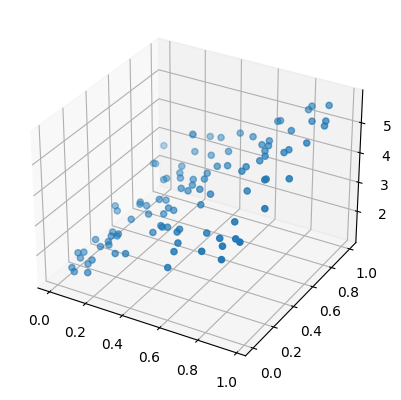

In [1]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch

torch.manual_seed(0)
X = torch.rand(100, 2)  # Two input features
y = 3 * X[:, 0] + 2 * X[:, 1] + 1 + 0.1 * torch.randn(100)  # Multiple linear regression equation

def visualize_dataset(X, y):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.scatter(X[:, 0], X[:, 1], y)
    plt.show()

visualize_dataset(X, y)


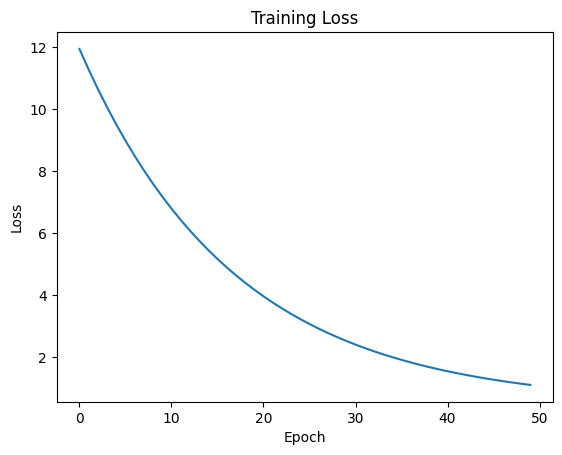

In [2]:
# Define a custom linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
model = LinearRegressionModel(input_dim=2)  # Two input features
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic gradient descent

# Lists to store losses for visualization
losses = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Zero the gradient buffers
    outputs = model(X)  # Forward pass
    loss = criterion(outputs, y.unsqueeze(1))  # Compute the loss
    loss.backward()  # Backpropagation (autograd)
    optimizer.step()  # Update weights

    # Store the loss at the end of each epoch
    losses.append(loss.item())

# Plotting the loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

plt.show()



In [3]:
def visualize_model(model, X, y):
    w1, w2 = model.linear.state_dict()['weight'][0]
    w1, w2 = w1.view(1), w2.view(1)
    b = model.linear.state_dict()['bias']

    surface_x = torch.arange(0, 1, 0.01).view(-1, 1).repeat(1, 100)
    surface_y = torch.arange(0, 1, 0.01).view(1, -1).repeat(100, 1)
    surface_z = surface_x * w1 + surface_y * w2 + b

    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.scatter(X[:, 0], X[:, 1], y)
    ax.plot_surface(surface_x, surface_y, surface_z, color="red", alpha=0.5)
    plt.show()


linear.weight Parameter containing:
tensor([[0.6611, 0.9556]], requires_grad=True)
linear.bias Parameter containing:
tensor([1.9408], requires_grad=True)


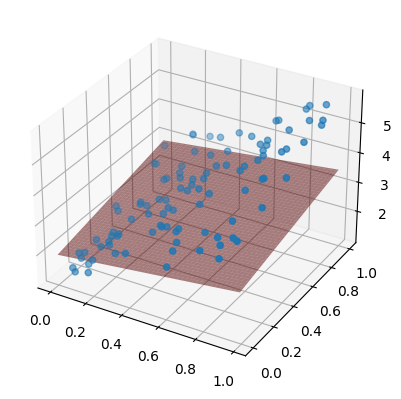

In [4]:
print()
# Print model's parameters
# 2 weights, 1 bias
for name, param in model.named_parameters():
  print(name, param)

visualize_model(model, X, y)